🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚

**EKSPERIMEN SISTEM MACHINE LEARNING** <br>
* **Nama:** Dina Nabila <br>
* **ID Dicoding:** dinanabila <br>

🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚🥚

# **1. Perkenalan Dataset**


Dataset ini menyediakan data mengenai jumlah penjualan telur selama 30 tahun (1 Januari 1993 s.d. 31 Desember 2021) dari sebuah toko di Sri Lanka, dengan total 10592 baris data. 

**Kolom:** <br>
**📆 Date**: tanggal penjualan <br>
**🥚 Egg Sales**: jumlah telur yang terjual pada tanggal yang bersangkutan

**Sumber dataset:** <br>
[Egg Sales of a local shop for 30 years - Kaggle](https://www.kaggle.com/datasets/kanchana1990/egg-sales-of-a-local-shop-for-30-years)

# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# untuk load dataset
import urllib.request as urllib
from io import BytesIO

# untuk normalisasi fitur
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

In [ ]:
# buka file dataset dari url menggunakan urllib
dataset_url = 'https://raw.githubusercontent.com/dinanabila/Eksperimen_SML_DinaNabila/a11c4f623480c73695aa76c54d1854108e9d812b/raw-dataset/train_egg_sales.csv'
response = urllib.urlopen(dataset_url)
dataset = BytesIO(response.read())

# masukkan dataset ke dataframe pandas
df = pd.read_csv(dataset, sep=';')
df.head(2)

,Date,Egg Sales
0,1993-01-01,91
1,1993-01-02,124


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, **Exploratory Data Analysis (EDA)** dilakukan untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Periksa informasi umum dataset**

Sebagai permulaan, kita periksa dulu informasi umum dari dataset telur yang akan kita gunakan.

In [ ]:
df.info()
print(f'Jumlah duplikasi data: {df.duplicated().sum()}')
print(f'Jumlah missing value: {df.isna().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       10592 non-null  object
 1   Egg Sales  10592 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 165.6+ KB
Jumlah duplikasi data: 0
Jumlah missing value: 0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Egg Sales,10592.0,366.326095,155.20262,0.0,235.0,366.0,499.0,713.0


**Insight:** <br>
- 10592 baris data
- 2 kolom: Date dan Egg Sales
- Tidak ada missing value
- Tidak ada duplikasi data
- Tipe data kolom Date **perlu disesuaikan**, dari tipe data object, menjadi tipe data **datetime**
- Rata-rata penjualan harian adalah sekitar 366 butir telur, dengan deviasi standar 155. Ini menunjukkan variasi yang cukup besar antar hari.
- Nilai median (366) sama dengan rata-rata, yang mengindikasikan distribusinya cukup simetris — tidak terlalu condong ke kanan / kiri.
- Penjualan minimum mencapai 0, yang bisa berarti tidak ada penjualan di hari itu (boleh jadi tutup / libur / memang datanya tidak tercatat)
- Penjualan maksimum adalah 713 butir dalam sehari, yang mana hampir 3x lipat dari Q1 (235). Ini bisa disebabkan karena adanya hari-hari dengan lonjakan tinggi (kemungkinan karena faktor musiman atau event khusus).

## **Ubah tipe data kolom Date**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10592 non-null  datetime64[ns]
 1   Egg Sales  10592 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 165.6 KB


## **Tambah kolom dayofweek, month, year**

Selanjutnya agar lebih mudah dalam memeriksa pola di dalam dataset telur ini, kita perlu membuat kolom baru, yaitu dayofweek, month, dan year berdasarkan kolom Date yang tipe datanya sudah kita ubah menjadi datetime.

In [ ]:
df['dayofweek'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [ ]:
df.head(2)

,Date,Egg Sales,dayofweek,month,year
0,1993-01-01,91,4,1,1993
1,1993-01-02,124,5,1,1993


## **Rata-rata penjualan telur per tahun**

In [ ]:
# hitung rata-rata penjualan per tahun
avg_year = df.groupby('year')['Egg Sales'].mean().reset_index()
avg_year.head(2)

,year,Egg Sales
0,1993,111.394521
1,1994,130.246575


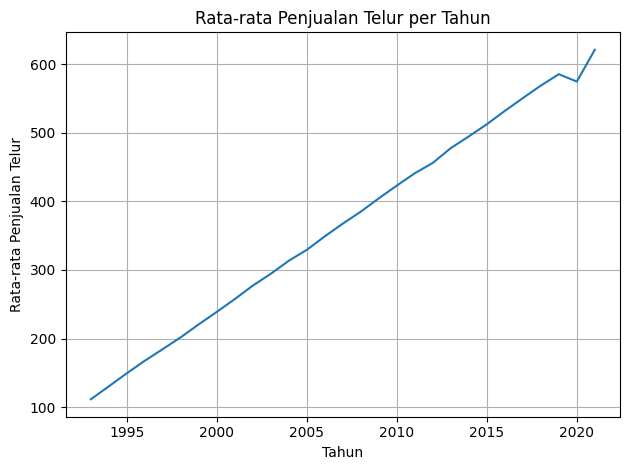

In [ ]:
# plot line chart
sns.lineplot(data=avg_year, x='year', y='Egg Sales')
plt.title('Rata-rata Penjualan Telur per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Penjualan Telur')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:** <br>
- Dari tahun ke tahun per tahun 1993, rata-rata penjualan telur terus menaik
- Pada tahun 2020, sempat menurun, tapi naik lagi
- Secara keseluruhan cenderung naik terus dari tahun ke tahun

## **Tambah kolom year_index**

Sekarang kita tambahkan kolom year_index. Kolom ini merupakan indeks dari year. Misalkan, data tahun 1993 indeks-nya 0. Tahun 1994 indeks-nya 1. Tahun 1996 indeks-nya 2. Begitupula seterusnya.

Kolom ini ditambahkan dalam rangka ditemukannya tren pada rata-rata penjualan telur dari tahun ke tahun (dapat dilihat di line chart sebelumnya). Dengan demikian, penambahan kolom year_index dapat membantu model dalam memahami hubungan antara tahun dan jumlah penjualan telur.

In [ ]:
df['year_index'] = df['year'] - df['year'].min()
df.sample(2)

,Date,Egg Sales,dayofweek,month,year,year_index
8780,2017-01-15,553,6,1,2017,24
5239,2007-05-07,370,0,5,2007,14


## **Rata-rata penjualan telur per bulan**

In [ ]:
avg_month_year = df.groupby(['year', 'month'])['Egg Sales'].mean().reset_index()
avg_month_year.head(2)

,year,month,Egg Sales
0,1993,1,108.387097
1,1993,2,112.678571


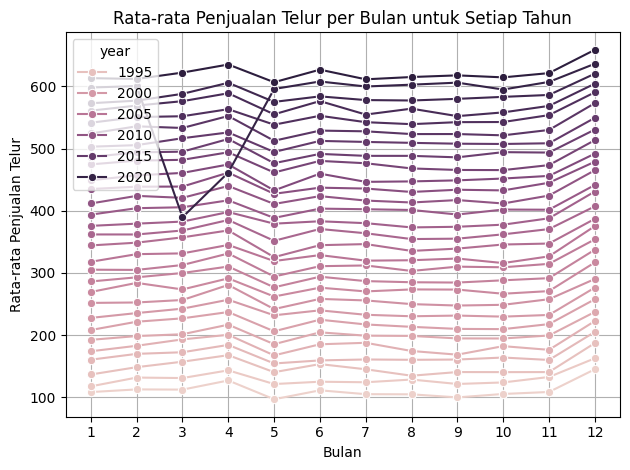

In [ ]:
# plot line chart
sns.lineplot(data=avg_month_year, x='month', y='Egg Sales', hue='year', marker='o')
plt.title('Rata-rata Penjualan Telur per Bulan untuk Setiap Tahun')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penjualan Telur')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:** <br>
- Setiap tahunnya, dari bulan ke bulan pola penjualan telur cenderung sama. Contohnya dari bulan maret ke bulan april, penjualan telur selalu naik dari tahun ke tahun. Juga, di bulan Desember, rata-rata penjualan telur selalu paling tinggi dari tahun ke tahun, diikuti bulan April untuk rata-rata tertinggi kedua.
- Namun ada yang perlu di-highlight di bulan Maret 2020. Rata-rata penjualan telur pada waktu tersebut menurun drastis jika dibandingkan bulan Maret pada tahun-tahun lainnya.
- Boleh jadi penurunan ini dikarenakan pandemi COVID-19 yang terjadi di waktu yang sama.
- Berdasarkan data line chart penjualan per tahun yang sudah dibuat sebelumnya, penurunan penjualan seperti ini tidak selalu terjadi. Pandemi COVID-19 juga sudah berakhir. Jadi, data penjualan telur di bulan Maret s.d. April 2020 dapat dianggap sebagai outlier, sehingga perlu di-**drop** pada tahap data preprocessing.

## **Rata-rata penjualan telur per hari**

In [ ]:
# hitung rata-rata penjualan per kombinasi bulan dan hari (semua tahun digabung)
avg_day_month = df.groupby(['month', 'dayofweek'])['Egg Sales'].mean().reset_index()

# ubah jadi pivot table
heatmap_data = avg_day_month.pivot(index='month', columns='dayofweek', values='Egg Sales')

# urutkan index dan kolom secara eksplisit
heatmap_data = heatmap_data.reindex(index=range(1, 13), columns=range(0, 7))

heatmap_data.head(2)

dayofweek,0,1,2,3,4,5,6
month,,,,,,,
1,357.812500,361.312500,359.679688,362.445312,357.496124,355.317829,356.837209
2,368.931624,363.153846,366.692308,361.000000,369.410256,366.393162,364.897436


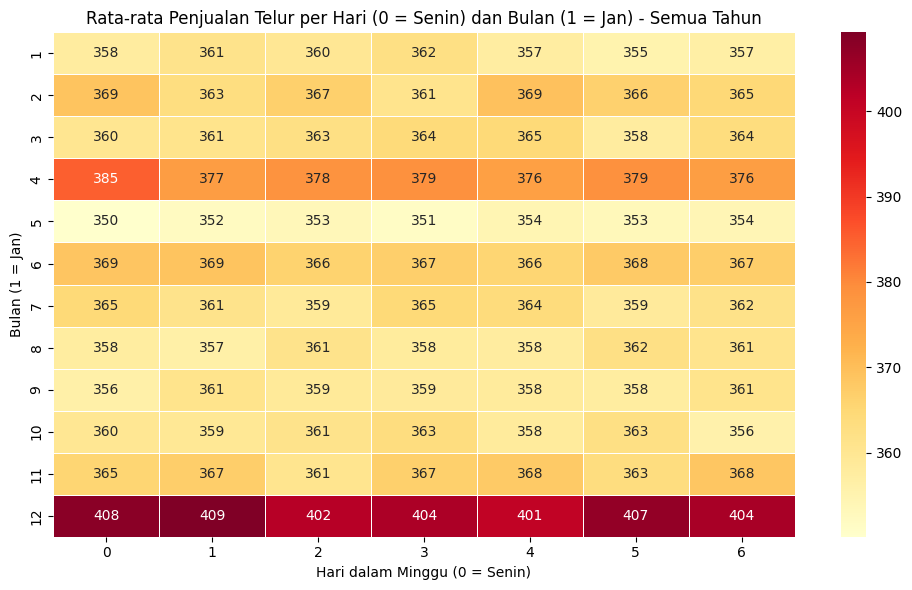

In [ ]:
# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".0f", linewidths=.5)
plt.title('Rata-rata Penjualan Telur per Hari (0 = Senin) dan Bulan (1 = Jan) - Semua Tahun')
plt.xlabel('Hari dalam Minggu (0 = Senin)')
plt.ylabel('Bulan (1 = Jan)')
plt.tight_layout()
plt.show()

**Insight:** <br>
Berdasarkan heatmap di atas, dapat dilihat bahwa dari bulan ke bulan, warna hari ke hari hampir seragam. Dalam satu baris, tidak ada warna yang bedanya jomplang (misal ada yang merah gelap, tapi ada juga yang kuning muda dalam satu baris yang sama). Artinya, **tidak ada pola yang signifikan** pada rata-rata penjualan telur berdasarkan dayofweek. Jadi, kolom **dayofweek tidak akan dijadikan fitur** untuk melatih model machine learning nanti.

## **Kesimpulan hasil EDA**

Berdasarkan EDA yang telah kita lakukan di atas, ditemukan **pola** rata-rata penjualan telur berdasarkan **bulan** dan **tahun**. Selain itu, ditemukan pula **outlier** pada Maret s.d. April 2020. Berangkat dari kedua informasi tersebut, berikut tindak lanjut yang perlu dilakukan pada data preprocessing di tahap selanjutnya:
- **Ganti data outlier** (data penjualan telur dari bulan Maret 2020 sampai April 2020) dengan interpolasi
- **Drop kolom year**, sebab yang akan kita gunakan adalah year_index
- **Drop kolom dayofweek**, sebab tidak ditemukan pola yang signifikan pada data rata-rata penjualan telur berdasarkan hari (dayofweek)
- Berdasarkan ringkasan statistik, karena rentang nilai cukup besar (0–713), **kolom Egg Sales perlu dinormalisasi** sebab kita akan membangun model time series dengan menggunakan neural network.

# **5. Data Preprocessing**

Pada tahap ini, kita akan melakuka. data preprocessing untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Berikut adalah tahapan-tahapan yang dilakukan:
1. Ganti data outlier (data Maret 2020 - April 2020) dengan interpolasi
2. Menghapus kolom yang tidak digunakan (dayofweek dan year)
3. Normalisasi fitur Egg Sales
4. Bagi dataset menjadi data latih dan data validasi

## **Ganti data outlier dengan interpolasi**

In [ ]:
# jadikan kolom Date sebagai index
df.set_index('Date', inplace=True)

# tandai data outlier (Maret s.d. April 2020) sebagai NaN
df.loc['2020-03-01':'2020-04-30', 'Egg Sales'] = None

# interpolasi secara time-based
df['Egg Sales'] = df['Egg Sales'].interpolate(method='time')

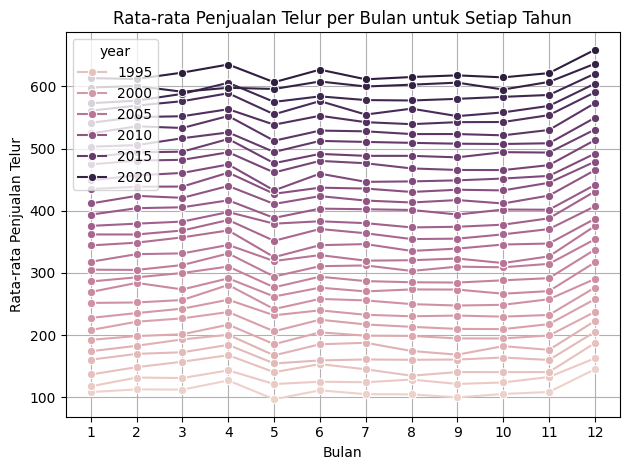

In [ ]:
# periksa apakah outlier sudah berhasil terinterpolasi atau belum
avg_month_year = df.groupby(['year', 'month'])['Egg Sales'].mean().reset_index()

# plot line chart
sns.lineplot(data=avg_month_year, x='month', y='Egg Sales', hue='year', marker='o')
plt.title('Rata-rata Penjualan Telur per Bulan untuk Setiap Tahun')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penjualan Telur')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

Jika dibandingkan dengan line chart Rata-rata Penjualan Telur per Bulan untuk Setiap Tahun yang telah dibuat sebelumnya, dapat dilihat bahwa data Maret 2020 sampai April 2020 sudah tidak terlalu terlihat jomplang lagi perbedaan polanya. Artinya, interpolasi berhasil diterapkan.

## **Drop kolom yang tidak diperlukan**

In [ ]:
df = df.drop(['dayofweek', 'year'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10592 entries, 1993-01-01 to 2021-12-31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Egg Sales   10592 non-null  float64
 1   month       10592 non-null  int32  
 2   year_index  10592 non-null  int32  
dtypes: float64(1), int32(2)
memory usage: 506.3 KB


## **Normalisasi fitur Egg Sales**

In [ ]:
# inisialisasi scaler minmax untuk normalisasi
scaler = MinMaxScaler()

# fit dan transform
df['Egg Sales'] = scaler.fit_transform(df[['Egg Sales']])

# periksa hasil normalisasi
df.head(2)

,Egg Sales,month,year_index
Date,,,
1993-01-01,0.054711,1,0
1993-01-02,0.104863,1,0


## **Bagi dataset menjadi data latih dan validasi**

In [ ]:
# bagi dataset 70:30
SPLIT_TIME = int(len(df) * 0.7)
x_train = df[:SPLIT_TIME]
x_valid = df[SPLIT_TIME:]

# periksa jumlah baris masing-masing data latih dan uji
print(f"Jumlah baris data latih: {x_train.shape[0]}")
print(f"Jumlah baris data uji: {x_valid.shape[0]}")

Jumlah baris data latih: 7414
Jumlah baris data uji: 3178


In [ ]:
def windowed_dataset(series, batch_size, n_past=24, n_future=24, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
BATCH_SIZE = 32
N_PAST = 24
N_FUTURE = 24
SHIFT = 1

# membuat windowed datasets
train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)
valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)